# Modelisation

# Trois modèles réalisés
* Dummy regressor pour la Base line
* Ridge Classifier
* Decision Tree

In [1]:
from sklearn.dummy import DummyRegressor
#Base Line avec la Dummy Regressor
params = {}
model = DummyRegressor(strategy="mean")
model.fit(X,y)
model.score(X_test,y_test)

NameError: name 'X' is not defined

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

#Validation croisée pour regression linéaire Ridge
model = RidgeClassifier()
params = {'alpha':[0.1,0.2,0.3,0.4,0.5, 1,2,3,4,5]}
clf = GridSearchCV(model,params,cv=5,scoring='accuracy')
clf.fit(X, y)

print(clf.best_estimator_)
#Meilleur paramètre avec alpha = 0.1

C:\Users\jerom\anaconda3\envs\PROJET5\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


RidgeClassifier(alpha=2)


In [49]:
#Evaluation du Score avec la regression Ridge
model = RidgeClassifier(alpha=.3)
model.fit(X,y)
model.score(X_test,y_test)

0.8925714285714286

In [51]:
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(X, y)

#Meilleur résultat avec max_depth = 9
print(clf.best_estimator_)

C:\Users\jerom\anaconda3\envs\PROJET5\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


DecisionTreeClassifier(max_depth=9)


In [52]:
#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=8)
model.fit(X,y)
model.score(X_test,y_test)

0.9931428571428571

# Affichage de l'arbre de décision

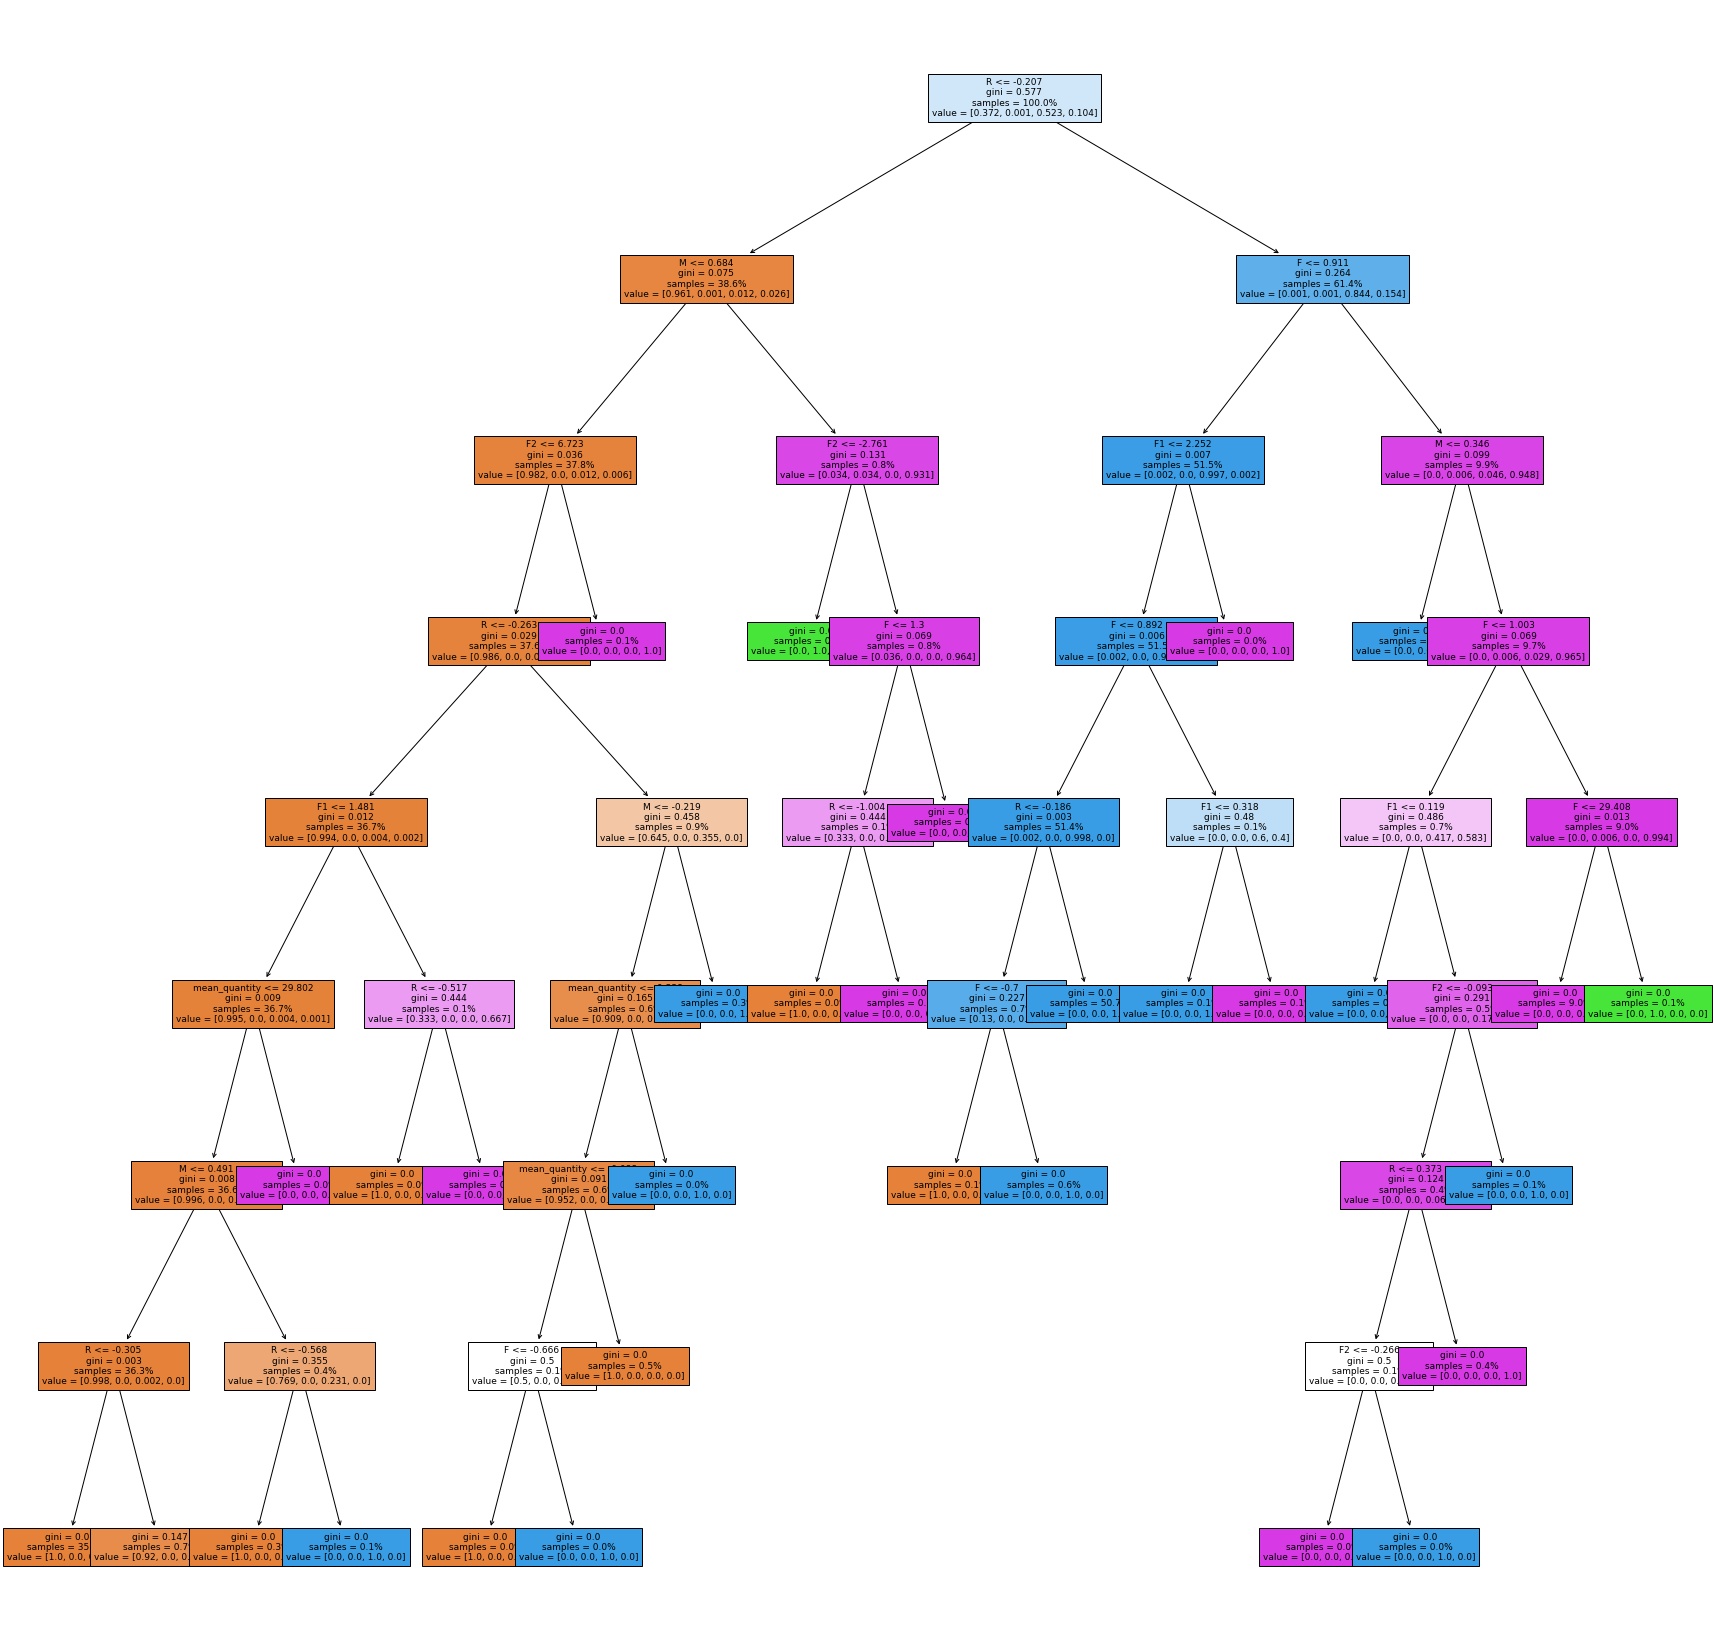

In [73]:
#Affichage de l'arbre de décision
from sklearn.tree import plot_tree
plt.figure(figsize=(30,30))
plot_tree(model, filled=True,feature_names = list(df_test_stand.loc[:,{'F','M','R','mean_quantity','F1','F2'}].columns),fontsize=9,proportion = True)
plt.show()

# Evaluation du score suivant le découpage du jeu d'entrainement
* Découpage standard en prenant un pourcentage du jeu total
* Prendre les premiers de la liste en l'ordonnant par date de commande
* Prendre les plus gros consommateurs
* nbre par cluster si pas mon nombre je ne le prends pas du tout

In [104]:
#Découpage sur la variable classification
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(df_train_stand, df_train_stand['Classification']):
    strat_train_test = df_train_stand.loc[train_index]
    
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(strat_train_test.drop({'Classification','CustomerID'}, axis=1).to_numpy(), strat_train_test['Classification'].to_numpy())

print(clf.best_estimator_)

#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=11)
model.fit(strat_train_test.drop({'Classification','CustomerID'}, axis=1).to_numpy(),strat_train_test['Classification'].to_numpy())
model.score(X_test,y_test)

DecisionTreeClassifier(max_depth=10)


0.9874285714285714

In [121]:
#Découpage pour prendre les 2800 première lignes
first = df_train_stand.loc[0:2800,]
    
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(first.drop({'Classification','CustomerID'}, axis=1).to_numpy(), first['Classification'].to_numpy())

print(clf.best_estimator_)

#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=5)
model.fit(first.drop({'Classification','CustomerID'}, axis=1).to_numpy(),first['Classification'].to_numpy())
model.score(X_test,y_test)

DecisionTreeClassifier(max_depth=7)


0.9851428571428571

In [130]:
#Découpage pour prendre les 2800 première lignes classées par R (Date du dernièr achat)
first_R = df_train_stand.sort_values(by = 'R').loc[0:2800,]
    
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(first_R.drop({'Classification','CustomerID'}, axis=1).to_numpy(), first_R['Classification'].to_numpy())

print(clf.best_estimator_)


#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=8)
model.fit(first_R.drop({'Classification','CustomerID'}, axis=1).to_numpy(),first_R['Classification'].to_numpy())
model.score(X_test,y_test)

DecisionTreeClassifier(max_depth=7)


0.6617142857142857

In [134]:
#Découpage pour prendre les 2800 première lignes classées par M (Montant achat)
first_M = df_train_stand.sort_values(by = 'M').loc[0:2800,]
    
#Validation croisée avec Arbre de décision
import sklearn.tree
params = {'max_depth': range(2, 15, 1)}

model = sklearn.tree.DecisionTreeClassifier()
clf = GridSearchCV(model,params,cv=5)
clf.fit(first_M.drop({'Classification','CustomerID'}, axis=1).to_numpy(), first_M['Classification'].to_numpy())

print(clf.best_estimator_)


#Evaluation du Score avec arbre de décission
model = sklearn.tree.DecisionTreeClassifier(max_depth=8)
model.fit(first_M.drop({'Classification','CustomerID'}, axis=1).to_numpy(),first_M['Classification'].to_numpy())
model.score(X_test,y_test)

C:\Users\jerom\anaconda3\envs\PROJET5\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


DecisionTreeClassifier(max_depth=10)


0.96